<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/medium_modelling_part_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIR Model
LICENSE: https://github.com/hf2000510/infectious_disease_modelling/blob/master/LICENSE

In [5]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 798kB 2.7MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=b219fa42edc233f6cc5334d2d85a60826105ad7faf6cfde3f83847f70b0c8798
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
Successfully built mpld3


 # compartmental model. 
 A compartmental model separates the population into several compartments, for example:
* __S__usceptible (can still be infected, “healthy”)
* __I__nfected
* __R__ecovered (were already infected, cannot get infected again)

We require the following parameters
* $N$: total population
* $S(t)$: number of people susceptible on day t
* $I(t)$: number of people infected on day t
* $R(t)$: number of people recovered on day t
* $\beta$: expected amount of people an infected person infects per day
* $D$: number of days an infected person has and can spread the disease
* $\gamma=1/D$: <!--γ --> the proportion of infected recovering per day ( = 1/D)

the basic reproduction number $R_0$, is the total number of people an infected person infects. We just used an intuitive formula: 
$$R_0 = \beta \cdot D\,.$$

Check $R_0$ for Colombia: https://github.com/restrepo/COVID-19/blob/master/covid.ipynb

In [0]:
def deriv(y, t, N=1000, β=1, γ=1/4):
    S, I, R = y
    dSdt = -β * S * I / N
    dIdt = β * S * I / N - γ * I
    dRdt = γ * I
    return dSdt, dIdt, dRdt

In [0]:
N = 1000
β = 0.275  # infected person infects 0.275 other person per day, such that R_0=1.1
D = 4.0 # infections lasts four days
γ = 1.0 / D

S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible

In [0]:
t = np.linspace(0, 299, 300) # Grid of time points (in days)
y0 = [S0, I0, R0] # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, β, γ))
S, I, R = ret.T

In [0]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

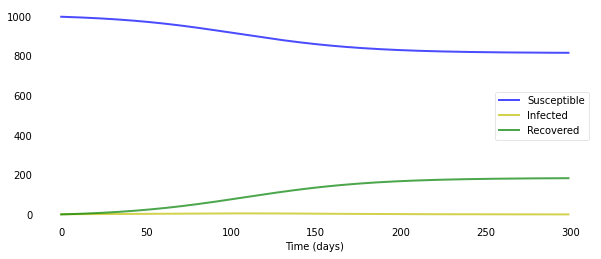

In [14]:
plotsir(t, S, I, R)